In [11]:
from dataclasses import dataclass

import numpy as np
import tensorflow as tp

from project.gen_data import gen_data
from project.post_processing import Plotter

In [12]:
@dataclass
class PinnConstParam:
    a = 0.4 # Thermal diffusivity
    L = 1 # Length of the bar, Assum x starts at 0
    n = 1 # Frequency of the sinusoidal initial conditions
    t_end = 1 # Assume t_start  = 0
    test_x_dim = 100
    test_t_dim = 100

In [13]:
const_params = PinnConstParam()
  
X_train, y_train = gen_data(
    "heat_1d_boundary_sin_exact",
    {
        "x_range": (0, const_params.L),
        "t_range": (0, const_params.t_end),
        "x_dim": const_params.test_x_dim,
        "t_dim": const_params.test_t_dim, 
        "a_coeff": const_params.a,
        "frequency": const_params.n,
    })

In [22]:
def getcompiledmodel():
    tp.keras.backend.set_floatx('float64')
    model=tp.keras.Sequential([
    tp.keras.layers.Dense(64),
    tp.keras.layers.Dense(64),
    tp.keras.layers.Dense(64),
    tp.keras.layers.Dense(64),
    tp.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tp.keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae','mse'])
    return model
model = getcompiledmodel()

In [23]:
model.fit(X_train, batch_size= 200,epochs= 1000)



Train on 10000 samples
Epoch 1/1000
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0910 - mean_absolute_error: 0.2134 - mean_squared_error: 0.0910
Epoch 2/1000
10000/10000 [==============================] - 0s 12us/sample - loss: 0.0159 - mean_absolute_error: 0.1131 - mean_squared_error: 0.0159
Epoch 3/1000
10000/10000 [==============================] - 0s 11us/sample - loss: 0.0108 - mean_absolute_error: 0.0977 - mean_squared_error: 0.0108
Epoch 4/1000
10000/10000 [==============================] - 0s 11us/sample - loss: 0.0074 - mean_absolute_error: 0.0813 - mean_squared_error: 0.0074
Epoch 5/1000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0059 - mean_absolute_error: 0.0732 - mean_squared_error: 0.0059
Epoch 6/1000
10000/10000 [==============================] - 0s 10us/sample - loss: 0.0044 - mean_absolute_error: 0.0630 - mean_squared_error: 0.0044
Epoch 7/1000
10000/10000 [==============================] - 0s 10us/sample - loss: 

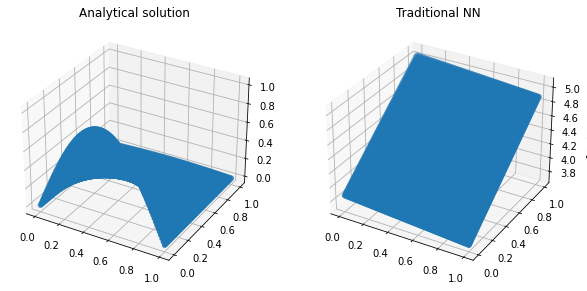

In [24]:
plotter = Plotter(1, 2)
plotter.plot_2d_y(X_train, y_train, "Analytical solution")
y_pred = model.predict(X_train)
plotter.plot_2d_y(X_train, y_pred, "Traditional NN")